In [ ]:
import os
# Check if you're on Google drive or on your own machine.
# Get path to your data.
if ('google' in str(get_ipython())):
    from google.colab import drive
    drive.mount('ME', force_remount=True)
    predir='ME/MyDrive/Colab_Notebooks/thesis'

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from tqdm import tqdm
import pickle

from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
groups = {
    'cat': ['nala_cat','realgrumpycat','smoothiethecat','catconworldwide','maple.cat','catinberlin','catladybox','triumphant_teagan','aliencatmatilda','mollymollzthetabby','my_lulu_cat_','my_furry_babies','monicasisson','allcreaturestv','moana.and.snapple','thatcatconrad','catsvscancer','baili_the_cat','panther.cat','rajathebengal','butter_the_siberian','trippy.tails','bearbear.cat','mochicat168','bellina_kitty_cat','rainerogers','ambrosepets','realbadgalrhirhi','pawaiihub','denbo_nish','siberian.milo'],
    'cook': ['halfbakedharvest','ketosnackz','nourishing','smittenkitchen','olivia.adriance','chloecleroux','geoffreyzakarian','177milkstreet','winnyhayes','alyssacoadynutrition','liveeatlearn','thefoodnanny','femalefoodie','sherryhour','allinspiredwellness','mytoddlerskitchen','simplicityandastarter','reciperunner','jamleenbears','lydialove98','mleroehler','anniesfinds_','carnivore_connoisseur_','littlespoonfarmblog','perfectsupplements','feelgoodwithfi','yourstrulyani','thismomentinthyme','leahmariestack','through.manals.lens','recipesfrommichelle','mccauley_tawpash','mintandclove','ashleighbovard','neeleman_food_'],
    # using lda
    'brands' : ['nike', 'adidas', 'starbucks', 'apple', 'samsung', 'netflix', 'amazon', 'google', 'microsoft', 'tesla', 'cocacola', 'pepsi', 'redbull', 'louisvuitton', 'gucci', 'chanel', 'prada', 'zara', 'hugo', 'hm', 'ikea', 'lego', 'target', 'walmart', 'mcdonalds', 'burgerking', 'kfc', 'dominos', 'airbnb', 'uber', 'spotify', 'youtube', 'facebook', 'instagram', 'twitter', 'pinterest', 'tiktok', 'snapchat', 'linkedin', 'sony', 'playstation', 'xbox', 'nintendo', 'disney', 'marvel', 'pixar', 'warnerbros', 'hbo', 'hulu', 'espn', 'nba', 'nfl', 'fifa', 'nikefootball', 'adidasfootball', 'puma', 'underarmour', 'reebok', 'converse', 'vans', 'forever21', 'victoriassecret', 'calvinklein', 'tommyhilfiger', 'ralphlauren', 'burberry', 'dior', 'versace', 'balenciaga', 'givenchy', 'fendi', 'hermes', 'cartier', 'tiffanyandco', 'rayban', 'oakley', 'gopro', 'canon', 'nikon', 'sonymusic', 'universalmusic', 'warnerrecords', 'atlanticrecords', 'rollingstone', 'vogue', 'elle', 'harpersbazaar', 'cosmopolitan'],
    # using deepseek
    'celebrities' : ['cristiano', 'leomessi', 'selenagomez', 'therock', 'kyliejenner', 'arianagrande', 'kimkardashian', 'beyonce', 'khloekardashian', 'justinbieber', 'kendalljenner', 'taylorswift', 'jlo', 'nickiminaj', 'kourtneykardash', 'mileycyrus', 'katyperry', 'zendaya', 'kevinhart4real', 'kingjames', 'ddlovato', 'badgalriri', 'champagnepapi', 'ellendegeneres', 'k.mbappe', 'billieeilish', 'lalalalisa_m', 'vindiesel', 'shraddhakapoor', 'priyankachopra', 'narendramodi', 'shakira', 'snoopdogg', 'davidbeckham', 'dualipa', 'jennierubyjane', 'aliaabhatt'],
    # using chatgpt
    'democrats' : ['joebiden', 'kamalaharris', 'barackobama', 'michelleobama', 'berniesanders', 'aoc', 'chuckSchumer', 'elizabethwarren', 'amyklobuchar', 'corybooker', 'chrismurphyct', 'repjerrynadler', 'repkatieporter', 'repvaldemings', 'repdebhaaland', 'repmarkpocan', 'repjimmygomez', 'repdavidcicilline', 'repdonbeyer', 'repderekkilmer', 'repsusielee', 'repkathleenrice', 'repjimhimes', 'repgregstanton', 'repjuanvargas', 'repmikethompson', 'repjimlangevin', 'repjimcosta', 'repjimmygomez', 'repjoshharder', 'repkatiehill'],
    'republicans' : ['mikepence', 'realdonaldtrump', 'potus', 'lindseygrahamsc', 'tedcruz', 'mittromney', 'pauldavisryan', 'ronjohnsonwi', 'marcorubio', 'newtgingrich', 'speakermccarthy', 'johncornyn', 'rondesantis', 'kristinoem', 'stevescalise', 'markmeadows', 'tx', 'elisestefanik', 'leezeldin', 'cathymcmorris', 'replizcheney', 'repmattgaetz', 'repbrianmast', 'repgregpence', 'repmarkgreen', 'repbuddycarter', 'repjeffduncan', 'repdavidkustoff', 'reppatfallon', 'repchrisstewart', 'repkenbuck'],
    # using deepseek

    'news': ['wsj', 'financialtimes', 'msnbc', 'cspan', 'theintercept', 'aljazeera', 'foxnews', 'guardian', 'time', 'nytimes', 'newsweek', 'bbcnews', 'bloomberg', 'nypost', 'businessinsider', 'cnn', 'forbes,politico', 'huffpost', 'abcnews', 'nbcnews', 'axios', 'thehill', 'cbsnews', 'usatoday', 'washingtonpost', 'vice', 'latimes', 'reuters', 'thedailybeast', 'npr', 'apnews'],

    'gun' : ['garand_thumb','gunpolicy','gunownersofamerica','sb.tactical','lawtactical','midwestindustries','centuryarms','gundrummer','griffin_armament','down_range_photography','maximdefense','zaffiri.precision','pewpewtactical','killerinnovations','rarebreedfirearms','battleborn','xtechtactical','gregskazphotography','kci_usa','firearmchronicles','patriot_defense_gear','704_tactical','armedscholaryt','shootersgrill','elevatedsilence','sdgunowners','womenforgunrights','gunownersca','2arally','rmgo_official'],
    # using lda

    'healthright' : ['thetruthaboutcancerttac','elaineshtein','drmercola','joshsfarmersmarket','dr.goodyear','crunchykass','raw_farm_usa','farmmatch','theregenaissance','momsacrossamerica','freedom.hill.farm','ilanamuhlsteinrd','jessalyn.randle','bobolinkdairyandbakehouse'],
    # using sbert

    'healthleft' : ['peoplescdc','clean.air.club','youlookokaytome','topheravila','thesicktimes','longcovidjustice','thaibrows','berlin_buyers_club','la.spoonie.collective','thecovidcollection','long_hauler_haven','maskednh','jaydocovid','maskblocseattle','cleartheair.atx','transgressivemedicine','itsjiyounkim'],

    # using sbert
    'queer' : ['them','themilesmckenna','queer_lective','dylanmulvaney','themme_fatale','chellaman','tanyacompas','mattxiv','sadegiliberti','jessicaoutofthecloset','genderlib','jake_graf5','raindovemodel','plussizetransguy','trans.ginger','trevorproject','chandlernwilson','blacktranstravelfund','mpjinstitute','gabesdunn'],

    'palestine' : ['jd.moha','mikopeled','wizard_bisan1','jewishvoiceforpeace','plestia.alaqad','belalkh','zein_rahma','eid_yara','lama_jamous9','jenanmatari','dr.ghassan.as','nooh.xp','savesilwan','amirgharabawi','saher_alghorra','haneen.maher.salem','palmuseum','yplusmedia','palestinianyouthmovement','right2edu','sjp.uo','uospalsoc','bigbigbigthings','jaxpsn','alaa_fayez.12','wizard_bisan2','bayanpalestine','mohammadhureini','hind.touissate','palestinehouseoffreedom','taniasafi','nadiforpalestine','queersinpalestine','apc_uk_london','shirien.creates','operationolivebranch'],
    'zionist' : ['betarworldwide','israelcc','standwithus','jewishwomen4allwomen','adielofisrael','ajc.global', 'strength4israel','_danielbraun','montanatucker','proudzionista','antisemitism','j.majburd','israel365action','bringhomenow','bring.amiram.home.now','aipac','kidnappedfromisrael','dahliakurtz','cameraoncampus','mactaskforce','elizabethyounger','lanianpo','henmazzig','freejamshidsharmahd','natashahausdorff','worldjewishcongress','allhostages','bringbackourhearts','thepersianjewess','michahdoot','leetrink','themodernmaccabee','ajewishresistance','zicksworld','abbasez'], # 'susancollinsla' not just israel

    'tradwife' : ['ourquaintandcozy','call_mejewels','hannahlee.yoder','simplyalliehomestead','ballerinafarm','esteecwilliams','zimcolorado','classicallyabby','naraaziza','lifewithmrsp', '_cynthialoewenseguin']
    # using sbert
}
groupmap = {v: k for k, vs in groups.items() for v in vs}
group_titles = {
    'cat': 'Cat',
    'cook': 'Cooking',
    'brands': 'Brands',
    'celebrities': 'Celebrities',
    'democrats': 'Democrats',
    'republicans': 'Republicans',
    'news': 'News',
    'gun': 'Gun',
    'healthright': 'Health Right',
    'healthleft': 'Health Left',
    'queer': 'LGBTQ',
    'palestine':'Pro-Palestine',
    'zionist': 'Zionist',
    'tradwife': 'Tradwives'
}
group_order = ['cat', 'cook', 'brands', 'celebrities', 'news','democrats', 'republicans', 'healthright', 'healthleft','gun', 'queer', 'tradwife','palestine', 'zionist']

finished_usernames = "thismomentinthyme,shraddhakapoor,trans.ginger,recipesfrommichelle,zaffiri.precision,reppatfallon,repdonbeyer,baili_the_cat,businessinsider,shootersgrill,trippy.tails,ambrosepets,classicallyabby,chellaman,ballerinafarm,patriot_defense_gear,mattxiv,bobolinkdairyandbakehouse,lindseygrahamsc,moana.and.snapple,instagram,mittromney,yplusmedia,arianagrande,_danielbraun,hind.touissate,plussizetransguy,selenagomez,through.manals.lens,repkenbuck,allinspiredwellness,jewishvoiceforpeace,taylorswift,pawaiihub,cspan,jaxpsn,repjerrynadler,mytoddlerskitchen,rarebreedfirearms,berniesanders,nooh.xp,xtechtactical,kevinhart4real,kamalaharris,repjuanvargas,catsvscancer,shakira,disney,themilesmckenna,taniasafi,repmarkpocan,itsjiyounkim,apc_uk_london,bigbigbigthings,rondesantis,target,reciperunner,chandlernwilson,palmuseum,repjimcosta,bayanpalestine,underarmour,nala_cat,bearbear.cat,repkathleenrice,liveeatlearn,barackobama,repjimhimes,aoc,repdebhaaland,cristiano,mcdonalds,lalalalisa_m,rmgo_official,smoothiethecat,tanyacompas,zendaya,louisvuitton,kimkardashian,calvinklein,victoriassecret,speakermccarthy,gabesdunn,queer_lective,montanatucker,down_range_photography,davidbeckham,belalkh,sdgunowners,repdavidkustoff,chrismurphyct,adidasfootball,winnyhayes,johncornyn,panther.cat,longcovidjustice,geoffreyzakarian,triumphant_teagan,blacktranstravelfund,ajewishresistance,nourishing,feelgoodwithfi,thetruthaboutcancerttac,israelcc,cartier,haneen.maher.salem,kourtneykardash,trevorproject,repbuddycarter,aliaabhatt,alaa_fayez.12,proudzionista,repjimlangevin,tedcruz,khloekardashian,transgressivemedicine,drmercola,pauldavisryan,michahdoot,repdavidcicilline,adielofisrael,freejamshidsharmahd,repkatieporter,sonymusic,repsusielee,leahmariestack,jake_graf5,microsoft,amirgharabawi,halfbakedharvest,billieeilish,femalefoodie,jlo,la.spoonie.collective,shirien.creates,mikepence,leezeldin,freedom.hill.farm,mpjinstitute,reuters,justinbieber,repbrianmast,lawtactical,704_tactical,ketosnackz,jessicaoutofthecloset,marcorubio,mccauley_tawpash,jennierubyjane,youlookokaytome,beyonce,gunownersofamerica,killerinnovations,elizabethyounger,right2edu,sadegiliberti,mleroehler,mintandclove,jd.moha,thaibrows,kyliejenner,them,esteecwilliams,starbucks,bloomberg,butter_the_siberian,my_furry_babies,pewpewtactical,farmmatch,alyssacoadynutrition,joebiden,repmarkgreen,priyankachopra,elevatedsilence,lydialove98,chloecleroux,amazon,thatcatconrad,narendramodi,hulu,aipac,kendalljenner,repgregpence,catconworldwide,badgalriri,uospalsoc,mikopeled,kristinoem,dylanmulvaney,dahliakurtz,champagnepapi,warnerrecords,repvaldemings,naraaziza,replizcheney,bellina_kitty_cat,repjoshharder,repchrisstewart,tommyhilfiger,neeleman_food_,aliencatmatilda,joshsfarmersmarket,raw_farm_usa,mohammadhureini,corybooker,plestia.alaqad,denbo_nish,wizard_bisan1,gundrummer,nickiminaj,kingjames,savesilwan,sb.tactical,ellendegeneres,antisemitism,gunownersca,topheravila,peoplescdc,rainerogers,repjimmygomez,abbasez,firearmchronicles,repkatiehill,mollymollzthetabby,anniesfinds_,lanianpo,zein_rahma,jessalyn.randle,call_mejewels,allcreaturestv,monicasisson,google,themme_fatale,maple.cat,perfectsupplements,kci_usa,nikefootball,mactaskforce,mochicat168,armedscholaryt,elaineshtein,kfc,chuckSchumer,leetrink,canon,catinberlin,battleborn,thefoodnanny,ourquaintandcozy,michelleobama,womenforgunrights,littlespoonfarmblog,zicksworld,olivia.adriance,leomessi,sherryhour,newtgingrich,elisestefanik,my_lulu_cat_,realgrumpycat,henmazzig,griffin_armament,_cynthialoewenseguin,repderekkilmer,centuryarms,lifewithmrsp,2arally,dr.goodyear,prada,eid_yara,ilanamuhlsteinrd,dominos,repjeffduncan,maximdefense,stevescalise,ashleighbovard,garand_thumb,k.mbappe,siberian.milo,nikon,cameraoncampus,realbadgalrhirhi,markmeadows,ronjohnsonwi,vice,raindovemodel,momsacrossamerica,repmattgaetz,repgregstanton,xbox,vindiesel,repmikethompson,katyperry,cathymcmorris,apple,therock,cosmopolitan,themodernmaccabee,pixar,ddlovato,worldjewishcongress,elizabethwarren,gopro,saher_alghorra,gunpolicy,catladybox,gregskazphotography,mileycyrus,midwestindustries,spotify,realdonaldtrump,yourstrulyani,amyklobuchar".split(",")

In [ ]:
REACHBACK = 14
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with open(predir+'/data/df_bypost_all.pkl', 'rb') as f:
    df_bypost = pickle.load(f)

df_bypost = df_bypost.dropna(subset=['post_times']).query('likes > 0')[df_bypost['username'].isin(finished_usernames)]

# Extract cyclical time features
def fourier_encode(df):
    df['hour'] = df['post_times'].dt.hour
    df['day_of_week'] = df['post_times'].dt.dayofweek  # 0=Monday
    df['month'] = df['post_times'].dt.month
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    return df

data = fourier_encode(df_bypost)


# Time since last post (in hours)
data['timedelta'] = data['timedelta'].fillna(-1)  # First post

data['log_likes'] = np.log(data['likes']+1)

# control

In [ ]:
split_before = pd.to_datetime('2024-07-01') # also try 6, 5, 4
data_before = data[data['date'] < split_before]
data_before = data_before[data_before['date'] > pd.to_datetime('2024-02-01')]

split = pd.to_datetime('2024-08-01')
data_after = data[data['date'] >= split]
data_after = data_after[data_after['date'] <= pd.to_datetime('2024-11-01')]

# for the data after, only include [reachback:] for each account
data_after = data_after.groupby('username').apply(lambda x: x.iloc[REACHBACK:]).reset_index(drop=True)

<ipython-input-7-0799db73fc8d>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_after = data_after.groupby('username').apply(lambda x: x.iloc[REACHBACK:]).reset_index(drop=True)


In [ ]:
with open(predir+'/residuals_grouped_nomeaning.pkl', 'rb') as f:
  residuals_grouped_nomeaning = pickle.load(f)

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import permutation_test
from datetime import timedelta

df_ttest = pd.DataFrame(columns=['group','tstat','pval','residual'])

for group, (residuals_before_train,residuals_before_val, residuals_before, residuals_after) in tqdm(residuals_grouped_nomeaning.items()):

    residuals_before = [x.cpu().numpy() for x in residuals_before]
    residuals_after = [x.cpu().numpy() for x in residuals_after]

    ttest = ttest_ind(residuals_before, residuals_after)
    # interval = ttest.confidence_interval()
    df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])

    before_ll = data_before.query('group == @group')['log_likes']
    after_ll = data_after.query('group == @group')['log_likes']

    ttest = ttest_ind(before_ll, after_ll)

    df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':False})])

df_ttest['signif'] = (df_ttest['pval'] * 14) < 0.05 # bonferroni correction

df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': ['healthleft','healthleft','queer','queer'], 'residual':[True,False,True,False]})])

# # order df_ttest by group_order
# df_ttest = df_ttest.set_index('group')
# # fill in missing groups
# df_ttest = df_ttest.reindex(group_order)
# df_ttest = df_ttest.loc[group_order].reset_index()
df_ttest['tstat'].fillna(0, inplace=True)
df_ttest['signif'].fillna(False, inplace=True)
df_ttest['signif_values'] = np.where(df_ttest['signif'], df_ttest['tstat'], 0)

  0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-9-eb2dbda7056a>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])
100%|██████████| 12/12 [00:00<00:00, 17.27it/s]
<ipython-input-9-eb2dbda7056a>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = d

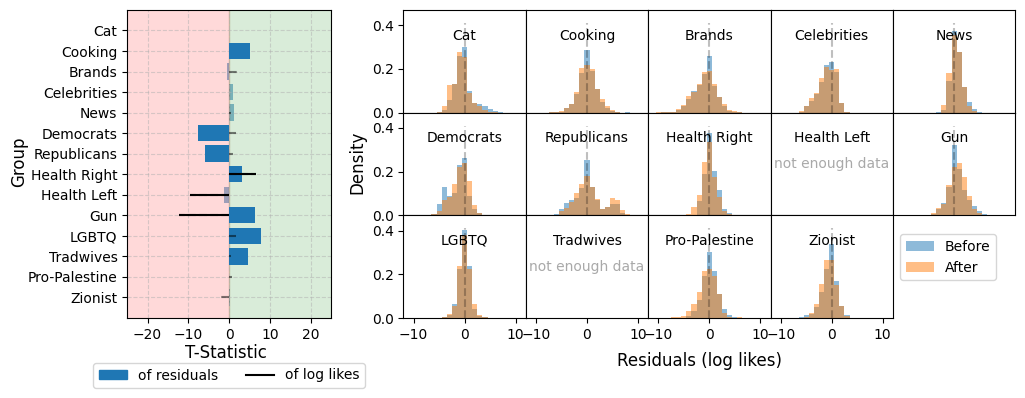

In [ ]:
fig = plt.figure(figsize=(10,4))
subfigs = fig.subfigures(1,2, width_ratios = [1,3], wspace= -0.1)

axL = subfigs[1].subplots(3,5, sharey = True, sharex = True)
plt.subplots_adjust(wspace=0, hspace=0)
for i, (ax,(group)) in enumerate(zip(axL.flat,group_order)):
  ax.set_xlim([-12, 12])
  if group in residuals_grouped_nomeaning.keys():
    residuals_before_train,residuals_before_val, residuals_before, residuals_after = residuals_grouped_nomeaning[group]
    residuals_before = [x.cpu().numpy() for x in residuals_before]
    residuals_after = [x.cpu().numpy() for x in residuals_after]
    ax.hist(residuals_before, alpha = 0.5 ,density=True, label = 'Before', bins = np.arange(-10.5,10.5,1))
    ax.hist(residuals_after, alpha = 0.5 ,density=True, label = 'After', bins = np.arange(-10.5,10.5,1))
    ax.vlines(0, 0, 0.41, colors='black', alpha = 0.25, linestyles="dashed")
  else:
    ax.text(0.5, 0.5, "not enough data", ha='center', va='center', transform=ax.transAxes, color = 'darkgrey')
  ax.text(0.5, 0.75, group_titles[group], ha='center', va='center', transform=ax.transAxes)
  # get ymax
  ax.set_ylim([0,0.47])

  if i == len(group_order) - 2:
    ax.legend(loc = 'lower right', bbox_to_anchor=(2.9,0.3))
  if i % 5 != 0:
    ax.yaxis.set_visible(False)
  if i == 9:
    ax.xaxis.set_visible(False)

  # if i%5 != 0:
  #   ax.set_yticks([])
  # else:
  #   ax.set_yticks([0,0.2,0.4])

# delete the last ax
axL.flat[-1].remove()
subfigs[1].supxlabel('Residuals (log likes)', y=-0.02)
subfigs[1].supylabel('Density', x=0.055)

#######################################
axR = subfigs[0].subplots(1,1)
axR.barh(df_ttest.query('residual == True')['group'][::-1], df_ttest.query('residual == True')['tstat'][::-1], alpha = 0.5)
axR.barh(df_ttest.query('signif ==True and residual == True')['group'][::-1], df_ttest.query('signif ==True and residual == True')['tstat'][::-1], color = 'tab:blue', zorder = 2)

axR.hlines(range(len(group_order)), xmin=0, xmax=df_ttest.query('residual == False')['tstat'], color='black', zorder = 4, alpha = 0.5, linestyles='dashed')
axR.hlines(range(len(group_order)), xmin=0, xmax=df_ttest.query('residual == False')['signif_values'], color='black', zorder = 4)

# use fill between to color postive values green and negative values red
axR.fill_betweenx([-100,100], -100, 0, color='red', alpha=0.15, zorder = 1)
axR.fill_betweenx([-100,100], 0, 100, color='green', alpha=0.15, zorder = 1)

# set ylim xlim
axR.set_ylim([-1,len(group_order)])
axR.set_xlim([-25,25])

axR.grid(zorder=1, alpha = 0.5,  linestyle='--')
axR.set_yticks(range(len(group_titles)), [group_titles.get(g, g) for g in group_order][::-1])
axR.set_xticks([-20,-10,0,10,20])

blue_patch = mpatches.Patch(color='tab:blue', label='Residuals')
black_line = mlines.Line2D([], [], color='black', label='Log likes t-statistic')

axR.legend(handles = [blue_patch, black_line], labels = ['of residuals', 'of log likes'], ncols = 2, loc = "lower center", bbox_to_anchor = (0.5, -0.25))

subfigs[0].supxlabel('T-Statistic', y = 0)
subfigs[0].supylabel('Group', x = -0.32)

plt.savefig(predir+'/figs/ttest_control.png',bbox_inches='tight', dpi = 800)

# palestine israel

In [ ]:
date_policy1 = pd.to_datetime('2024-02-09')
earliest_before = pd.to_datetime('2023-10-01')

before_dates = pd.date_range(start=earliest_before - pd.Timedelta(days=1), end=date_policy1 - pd.Timedelta(days=14), freq='1ME') + pd.Timedelta(days=1)
len(before_dates), before_dates

(4,
 DatetimeIndex(['2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01'], dtype='datetime64[ns]', freq=None))

In [ ]:
import io
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [ ]:
# with open(f'{predir}/residuals/residuals1.pkl', 'rb') as f:
#     residuals1 = pickle.load(f)

residuals1 = {}

for group in tqdm(group_order):
  residuals1[group] = {}
  for before in before_dates:
    before_string = before.strftime("%Y-%m-%d")
    # check if path {group}_before exists
    if not os.path.exists(f'{predir}/residuals/set3/{group}_{before_string}.pkl'):
      residuals1[group][before] = None
    else:
      with open(f'{predir}/residuals/set3/{group}_{before_string}.pkl', 'rb') as f:
        residuals1[group][before] = CPU_Unpickler(f).load()

      #   residuals1[group][before] = torch.load(f,map_location='cpu', weights_only=False)

100%|██████████| 14/14 [02:59<00:00, 12.81s/it]


In [ ]:
# t-test on averages before and after
from scipy.stats import ttest_ind
from scipy.stats import permutation_test
from datetime import timedelta

df_ttest = pd.DataFrame(columns=['group','before','tstat','pval','residual'])

for group in group_order:
  for before in before_dates:
    try:
      before_residuals, after_residuals = residuals1[group][before][0], residuals1[group][before][1]

      ttest = ttest_ind(before_residuals, after_residuals)
      # interval = ttest.confidence_interval()
      df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])
    except:
      df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [np.nan], 'pval': [np.nan], 'residual':True})])
    before_ll = data[data['date'] < before].query('group == @group')['log_likes']
    after_ll = data[data['date'] >= date_policy1].query('group == @group')['log_likes']

    ttest = ttest_ind(before_ll, after_ll)

    df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':False})])

df_ttest['signif'] = (df_ttest['pval'] * 14) < 0.05 # bonferroni correction

<ipython-input-15-7d8995d26ee4>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])


Text(0, 0.5, 'T-Statistic')

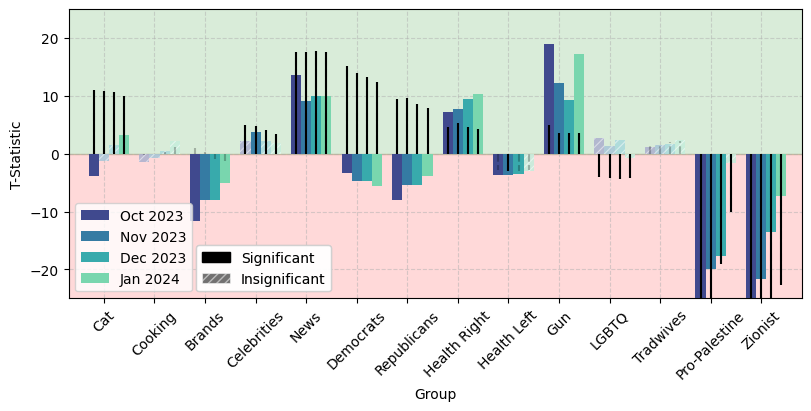

In [ ]:
# make a grouped barchart with different colors for different 'before'
x = np.arange(len(group_order))
width = 0.2
multiplier = 0

# make colormap from seaborn rocket
colors = sns.color_palette("mako", len(before_dates)+1)[1:]

fig, ax = plt.subplots(layout='constrained', figsize = (8,4))
for color, before in zip(colors, before_dates):
  offset = width * multiplier
  df_before = df_ttest[df_ttest['before'] == before]
  df_residual = df_before[df_before['residual'] == True].copy()
  df_ll = df_before[df_before['residual'] == False].copy()

  # rects = ax.bar(x + offset, df_ll['tstat'], 0.05, color='black', alpha = 0.75, zorder = 4)
  # change to vlines
  ax.vlines(x + offset, ymin=0, ymax=df_ll['tstat'], color='black', alpha = 0.25, zorder = 4, linestyles='dashed')

  # rects = ax.bar(x + offset, df_ll['tstat'], 0.05, edgecolor='white', color = 'white', hatch = '////', alpha = 0.5, hatch_linewidth = 2, zorder = 4, linewidth = 0)
  # get tstat if significant, otherwise 0
  df_ll['signif_values'] = np.where(df_ll['signif'], df_ll['tstat'], 0)
  # rects = ax.bar(x + offset, df_ll['signif_values'], 0.05, color='black', zorder = 4)
  ax.vlines(x + offset, ymin=0, ymax=df_ll['signif_values'], color='black', zorder = 4)


  rects = ax.bar(x + offset, df_residual['tstat'], width, color=color, alpha = 0.75, zorder = 3)
  rects = ax.bar(x + offset, df_residual['tstat'], width, edgecolor='white', color = 'white', hatch = '////', alpha = 0.5, hatch_linewidth = 0.8, zorder = 3, linewidth = 0)
  # get tstat if significant, otherwise 0
  df_residual['signif_values'] = np.where(df_residual['signif'], df_residual['tstat'], 0)
  rects = ax.bar(x + offset, df_residual['signif_values'], width, color=color, zorder = 3, label=before.strftime("%b %Y"))
  # ax.bar_label(rects, padding=3)
  multiplier += 1

ax.fill_betweenx([-100,0], -100, 100, color='red', alpha=0.15, zorder = 1)
ax.fill_betweenx([0,100], -100, 100, color='green', alpha=0.15, zorder = 1)

ax.set_ylabel('t-statistic')
ax.set_xticks(x + width, [group_titles[x] for x in group_order], rotation = 45)

# set ylim
ax.set_ylim(-25,25)
ax.set_xlim([-0.5,len(group_order)])

# add black square labeled "significant" and black with alpha = 0 and white hatches as "insignificant"
black_patch = mpatches.Patch(color='black', label = 'Significant')
white_patch = mpatches.Patch(color='black', label = 'Insignificant', alpha = 0.5)
white_patch.update({'hatch': '////', 'edgecolor': 'white', 'linewidth': 0.8})

# make separate legend for significant insignificant
handles, labels = ax.get_legend_handles_labels()
l1 = ax.legend(handles, labels, loc = 3)
l2 = ax.legend(handles=[black_patch, white_patch], labels=['Significant', 'Insignificant'], loc=3,bbox_to_anchor=(0.165,0))
ax.add_artist(l1)
ax.add_artist(l2)


# add grid
ax.grid(alpha=0.5, linestyle='--', zorder = 0)

ax.set_xlabel('Group')
ax.set_ylabel('T-Statistic')

# plt.savefig(predir+'/figs/ttest_split1.png',bbox_inches='tight', dpi = 800)

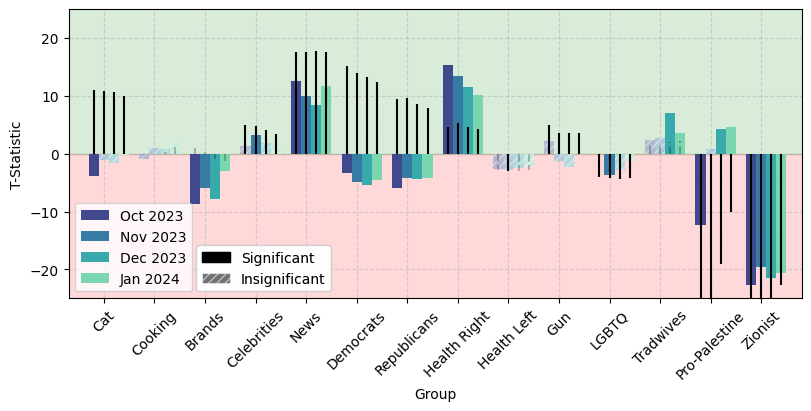

In [ ]:
# make a grouped barchart with different colors for different 'before'
x = np.arange(len(group_order))
width = 0.2
multiplier = 0

# make colormap from seaborn rocket
colors = sns.color_palette("mako", len(before_dates)+1)[1:]

fig, ax = plt.subplots(layout='constrained', figsize = (8,4))
for color, before in zip(colors, before_dates):
  offset = width * multiplier
  df_before = df_ttest[df_ttest['before'] == before]
  df_residual = df_before[df_before['residual'] == True].copy()
  df_ll = df_before[df_before['residual'] == False].copy()

  # rects = ax.bar(x + offset, df_ll['tstat'], 0.05, color='black', alpha = 0.75, zorder = 4)
  # change to vlines
  ax.vlines(x + offset, ymin=0, ymax=df_ll['tstat'], color='black', alpha = 0.25, zorder = 4, linestyles='dashed')

  # rects = ax.bar(x + offset, df_ll['tstat'], 0.05, edgecolor='white', color = 'white', hatch = '////', alpha = 0.5, hatch_linewidth = 2, zorder = 4, linewidth = 0)
  # get tstat if significant, otherwise 0
  df_ll['signif_values'] = np.where(df_ll['signif'], df_ll['tstat'], 0)
  # rects = ax.bar(x + offset, df_ll['signif_values'], 0.05, color='black', zorder = 4)
  ax.vlines(x + offset, ymin=0, ymax=df_ll['signif_values'], color='black', zorder = 4)


  rects = ax.bar(x + offset, df_residual['tstat'], width, color=color, alpha = 0.75, zorder = 3)
  rects = ax.bar(x + offset, df_residual['tstat'], width, edgecolor='white', color = 'white', hatch = '////', alpha = 0.5, hatch_linewidth = 0.8, zorder = 3, linewidth = 0)
  # get tstat if significant, otherwise 0
  df_residual['signif_values'] = np.where(df_residual['signif'], df_residual['tstat'], 0)
  rects = ax.bar(x + offset, df_residual['signif_values'], width, color=color, zorder = 3, label=before.strftime("%b %Y"))
  # ax.bar_label(rects, padding=3)
  multiplier += 1

ax.fill_betweenx([-100,0], -100, 100, color='red', alpha=0.15, zorder = 1)
ax.fill_betweenx([0,100], -100, 100, color='green', alpha=0.15, zorder = 1)

ax.set_ylabel('t-statistic')
ax.set_xticks(x + width, [group_titles[x] for x in group_order], rotation = 45)

# set ylim
ax.set_ylim(-25,25)
ax.set_xlim([-0.5,len(group_order)])

# add black square labeled "significant" and black with alpha = 0 and white hatches as "insignificant"
black_patch = mpatches.Patch(color='black', label = 'Significant')
white_patch = mpatches.Patch(color='black', label = 'Insignificant', alpha = 0.5)
white_patch.update({'hatch': '////', 'edgecolor': 'white', 'linewidth': 0.8})

# make separate legend for significant insignificant
handles, labels = ax.get_legend_handles_labels()
l1 = ax.legend(handles, labels, loc = 3)
l2 = ax.legend(handles=[black_patch, white_patch], labels=['Significant', 'Insignificant'], loc=3,bbox_to_anchor=(0.165,0))
ax.add_artist(l1)
ax.add_artist(l2)


# add grid
ax.grid(alpha=0.5, linestyle='--', zorder = 0)

ax.set_xlabel('Group')
ax.set_ylabel('T-Statistic')

plt.savefig(predir+'/figs/ttest_split1.png',bbox_inches='tight', dpi = 800)

# trump inaug

In [ ]:
date_policy2 = pd.to_datetime('2025-01-07')
earliest_before = pd.to_datetime('2024-09-01')

before_dates = pd.date_range(start=earliest_before - pd.Timedelta(days=1), end=date_policy2 - pd.Timedelta(days=14), freq='1ME') + pd.Timedelta(days=1)
len(before_dates), before_dates

(4,
 DatetimeIndex(['2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'], dtype='datetime64[ns]', freq=None))

In [ ]:
with open(f'{predir}/residuals/residuals2.pkl', 'rb') as f:
    residuals2 = pickle.load(f)

In [ ]:
# t-test on averages before and after
from scipy.stats import ttest_ind
from scipy.stats import permutation_test
from datetime import timedelta

df_ttest = pd.DataFrame(columns=['group','before','tstat','pval','residual'])

for group in group_order:
  for before in before_dates:
    before_residuals, after_residuals = residuals2[group][before][0], residuals2[group][before][1]

    ttest = ttest_ind(before_residuals, after_residuals)
    # interval = ttest.confidence_interval()
    df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])

    before_ll = data[data['date'] < before].query('group == @group')['log_likes']
    after_ll = data[data['date'] >= date_policy2].query('group == @group')['log_likes']

    ttest = ttest_ind(before_ll, after_ll)

    df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':False})])

df_ttest['signif'] = (df_ttest['pval'] * 14) < 0.05 # bonferroni correction

<ipython-input-8-593ecf9b2691>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])


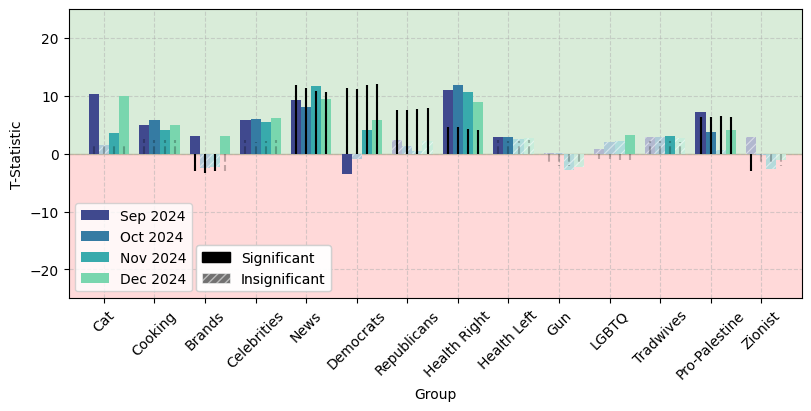

In [ ]:
# make a grouped barchart with different colors for different 'before'


x = np.arange(len(group_order))
width = 0.2
multiplier = 0

# make colormap from seaborn rocket
colors = sns.color_palette("mako", len(before_dates)+1)[1:]

fig, ax = plt.subplots(layout='constrained', figsize = (8,4))
for color, before in zip(colors, before_dates):
  offset = width * multiplier
  df_before = df_ttest[df_ttest['before'] == before]
  df_residual = df_before[df_before['residual'] == True].copy()
  df_ll = df_before[df_before['residual'] == False].copy()

  # rects = ax.bar(x + offset, df_ll['tstat'], 0.05, color='black', alpha = 0.75, zorder = 4)
  # change to vlines
  ax.vlines(x + offset, ymin=0, ymax=df_ll['tstat'], color='black', alpha = 0.25, zorder = 4, linestyles='dashed')

  # rects = ax.bar(x + offset, df_ll['tstat'], 0.05, edgecolor='white', color = 'white', hatch = '////', alpha = 0.5, hatch_linewidth = 2, zorder = 4, linewidth = 0)
  # get tstat if significant, otherwise 0
  df_ll['signif_values'] = np.where(df_ll['signif'], df_ll['tstat'], 0)
  # rects = ax.bar(x + offset, df_ll['signif_values'], 0.05, color='black', zorder = 4)
  ax.vlines(x + offset, ymin=0, ymax=df_ll['signif_values'], color='black', zorder = 4)


  rects = ax.bar(x + offset, df_residual['tstat'], width, color=color, alpha = 0.75, zorder = 3)
  rects = ax.bar(x + offset, df_residual['tstat'], width, edgecolor='white', color = 'white', hatch = '////', alpha = 0.5, hatch_linewidth = 0.8, zorder = 3, linewidth = 0)
  # get tstat if significant, otherwise 0
  df_residual['signif_values'] = np.where(df_residual['signif'], df_residual['tstat'], 0)
  rects = ax.bar(x + offset, df_residual['signif_values'], width, color=color, zorder = 3, label=before.strftime("%b %Y"))
  # ax.bar_label(rects, padding=3)
  multiplier += 1

ax.fill_betweenx([-100,0], -100, 100, color='red', alpha=0.15, zorder = 1)
ax.fill_betweenx([0,100], -100, 100, color='green', alpha=0.15, zorder = 1)

ax.set_ylabel('t-statistic')
ax.set_xticks(x + width, [group_titles[x] for x in group_order], rotation = 45)

# set ylim
ax.set_ylim(-25,25)
ax.set_xlim([-0.5,len(group_order)])

# add black square labeled "significant" and black with alpha = 0 and white hatches as "insignificant"
black_patch = mpatches.Patch(color='black', label = 'Significant')
white_patch = mpatches.Patch(color='black', label = 'Insignificant', alpha = 0.5)
white_patch.update({'hatch': '////', 'edgecolor': 'white', 'linewidth': 0.8})

# make separate legend for significant insignificant
handles, labels = ax.get_legend_handles_labels()
l1 = ax.legend(handles, labels, loc = 3)
l2 = ax.legend(handles=[black_patch, white_patch], labels=['Significant', 'Insignificant'], loc=3,bbox_to_anchor=(0.165,0))
ax.add_artist(l1)
ax.add_artist(l2)


# add grid
ax.grid(alpha=0.5, linestyle='--', zorder = 0)

ax.set_xlabel('Group')
ax.set_ylabel('T-Statistic')

plt.savefig(predir+'/figs/ttest_split2.png',bbox_inches='tight', dpi = 800)